## [SVHN](https://pytorch.org/docs/stable/torchvision/datasets.html#svhn)

In [1]:
import os
import random
import numpy as np
import torch
import torchvision

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [3]:
dataset = torchvision.datasets.SVHN('../data', download=True)

Using downloaded and verified file: ../data/train_32x32.mat


In [4]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.svhn.SVHN'>


In [5]:
print(len(dataset))

73257


In [6]:
n = 200
data, target = dataset[n]

In [7]:
print(type(data))

<class 'PIL.Image.Image'>


In [8]:
print(data.mode, data.width, data.height)

RGB 32 32


In [9]:
print(type(target))

<class 'int'>


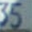

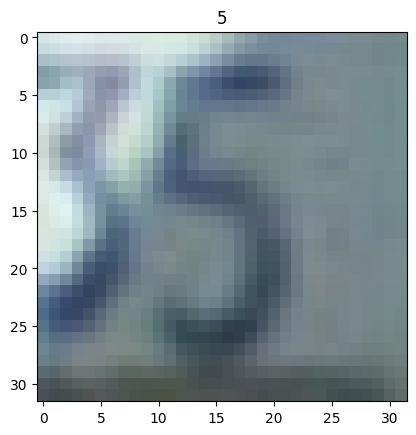

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data)
data.show()

In [11]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.SVHN('../data', transform = ToTensor)

In [12]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])


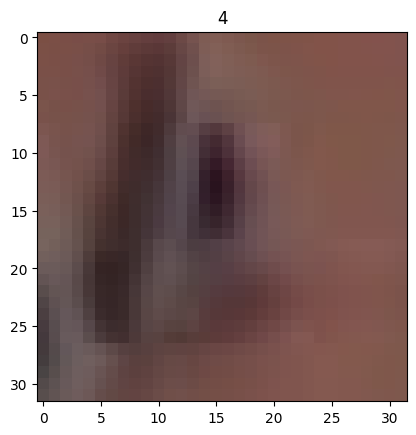

In [13]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic)
    plt.show()
    break

In [14]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])


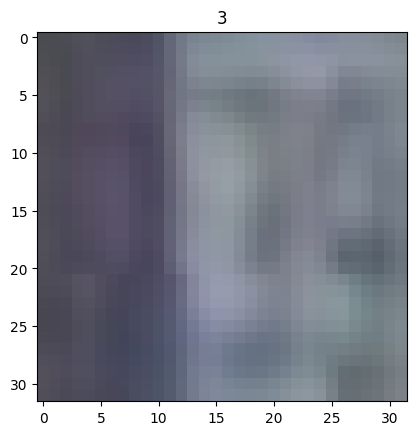

In [15]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(pic)
    plt.show()
    break

In [16]:
# 1000개 batch
n = 1000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 2000개 batch
n = 2000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 999개 batch
n = 999
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))

print(l)
print('Total number of data: {}'.format(i))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 257]
Total number of data: 73257
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1257]
Total number of data: 73257
[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 9

In [17]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [18]:
import torchvision.transforms as transforms
compose = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

train_data = torchvision.datasets.SVHN(root='../data/', split='train', transform=compose, download=True)
test_data  = torchvision.datasets.SVHN(root='../data/', split='test', transform=compose, download=True)

Using downloaded and verified file: ../data/train_32x32.mat


100%|██████████| 64275384/64275384 [00:01<00:00, 43414423.18it/s]


In [19]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 73257
test sets: 26032


In [20]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [21]:
class SVHNModel(nn.Module):
    def __init__(self, output_size):
        super(SVHNModel, self).__init__()

        self.c1 = nn.Conv2d(3, 8, kernel_size=3)
        self.c2 = nn.Conv2d(8, 16, kernel_size=3)
        self.c3 = nn.Conv2d(16, 32, kernel_size=3)
        self.c4 = nn.Conv2d(32, 32, kernel_size=3) 
        self.c5 = nn.Conv2d(32, 64, kernel_size=3) 

        nn.init.kaiming_normal_(self.c1.weight)
        nn.init.kaiming_normal_(self.c2.weight)
        nn.init.kaiming_normal_(self.c3.weight)
        nn.init.kaiming_normal_(self.c4.weight)
        nn.init.kaiming_normal_(self.c5.weight)
        
        self.cv = nn.Sequential(
                self.c1,            # (n, 8, 30, 30)
                nn.BatchNorm2d(8),
                nn.ReLU(),
                nn.Dropout(0.2),
                nn.MaxPool2d(2),    # (n, 8, 15, 15)
                self.c2,            # (n, 16, 13, 13)
                nn.BatchNorm2d(16),
                nn.ReLU(),
                nn.Dropout(0.2),
                self.c3,            # (n, 32, 11, 11)
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.Dropout(0.2),
                self.c4,            # (n, 32, 9, 9)
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.Dropout(0.2),
                self.c5,            # (n, 64, 7, 7)
                nn.BatchNorm2d(64),
                nn.ReLU(),
                nn.Dropout(0.2)
        )

        self.l1 = nn.Linear(64*7*7, 512)
        self.l2 = nn.Linear(512, 256)
        self.l3 = nn.Linear(256, output_size)
        nn.init.kaiming_normal_(self.l1.weight)
        nn.init.kaiming_normal_(self.l2.weight)
        nn.init.kaiming_normal_(self.l3.weight)

        self.fc = nn.Sequential(self.l1,
                        nn.BatchNorm1d(512),
                        nn.ReLU(),
                        self.l2,
                        nn.BatchNorm1d(256),
                        nn.ReLU(),
                        self.l3,
                        nn.BatchNorm1d(output_size),
                    )        

    def forward(self, x):
        x = self.cv(x)
        x = x.view(-1, 64*7*7)
        output = self.fc(x)
        value = torch.max(output, 1)[1]
        return output, value

In [22]:
model = SVHNModel(10).to(device)

In [23]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y, _ = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 3, 32, 32])
tensor([[ 0.5033,  1.2796, -1.2897,  0.2672,  1.1002,  1.1124, -0.0776,  0.1588,
         -1.2309,  0.7546],
        [ 1.7457, -1.8668,  0.7631, -1.3284, -1.3481,  1.8735,  0.7827, -0.0138,
          0.3062, -2.5386],
        [ 0.1847,  0.3117,  1.5449, -1.4706,  0.5296, -0.3786,  1.2215, -0.1823,
          0.5922,  1.0744],
        [ 0.2830,  0.4751, -0.3764, -1.3807,  0.6420,  0.5210, -0.2500,  2.4046,
          2.0652,  0.0263],
        [-2.4031, -0.9741,  0.3405, -0.0364,  0.5438, -0.7741, -1.2766, -0.4705,
         -0.8452, -0.1836],
        [-0.2591,  0.6380,  0.9207,  1.5647, -0.6300, -0.9489,  0.1106,  0.0127,
         -1.4685, -0.6029],
        [ 0.6231, -1.4733,  0.1272,  0.9987, -2.1093, -1.4944,  0.5883, -1.8992,
          0.7740,  0.5569],
        [ 0.1259,  0.7183, -1.0005,  0.4109, -0.2036, -0.1048,  0.7452,  0.4654,
         -0.5056, -0.1991],
        [-0.4916,  0.2065, -1.6800,  0.5309,  0.6753,  0.8301,  0.4166, -0.2553,
          0.1599,  

In [24]:
BATCH_SIZE = 1000

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [25]:
model = SVHNModel(10).to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 10 # 10회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y, _ = model(train_data)
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_data
        del train_target

    model.eval()
    n_test = 0
    test_loss = 0
    correct = 0
    total = 0
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        y_pred, idx_pred = model(test_data)
        del test_data
        loss = criterion(y_pred, test_target).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1
        total += len(test_target)
        correct += (idx_pred == test_target).sum()

    accuracy = correct * 100 / total
    print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
            epoch, train_loss / n_train, test_loss / n_test,
            accuracy
        ))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 0th training loss: 0.9750614117931675 test loss: 0.5006855273688281, accuracy: 85.77135467529297
epoch 1th training loss: 0.4330129389827316 test loss: 0.38054836403440545, accuracy: 88.66779327392578
epoch 2th training loss: 0.3424102929798332 test loss: 0.3318837616178725, accuracy: 90.1851577758789
epoch 3th training loss: 0.2989850795349559 test loss: 0.2847068585731365, accuracy: 91.38368225097656
epoch 4th training loss: 0.2666886146809604 test loss: 0.2756054428992448, accuracy: 92.00598907470703
epoch 5th training loss: 0.2393626327047477 test loss: 0.29377838417335794, accuracy: 91.80239868164062
epoch 6th training loss: 0.21757733821868896 test loss: 0.2753041452831692, accuracy: 92.08666229248047
epoch 7th training loss: 0.19966639477658915 test loss: 0.2676997758724071, accuracy: 92.11739349365234
epoch 8th training loss: 0.18650808688756582 test loss: 0.2610085672802395, accuracy: 92.20958709716797
epoch 9th training loss: 0.16606202973304568 test loss: 0.26119149835

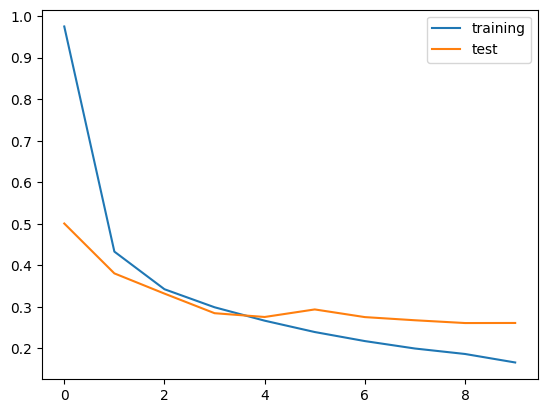

In [26]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
import numpy as np

model.eval()
y_test = None
y_pred = None
for test_data, test_target in test_loader:
    test_data = test_data.to(device)
    test_target = test_target.to(device)
    _, y = model(test_data)
    del test_data
    if None == y_test:
        y_test = test_target
    else:
        torch.cat([y_test, test_target], dim=0)
    if None == y_pred:
        y_pred = y
    else:
        torch.cat([y_pred, y], dim=0)

score = accuracy_score(y_test.cpu(), y_pred.cpu())
print(score)

0.92
